#**ММО-РК1**
#ИУ5И-22М 
#Ван Пэй
#Вариант №16

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [ ]:
data = pd.read_csv('health.csv', sep=",")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


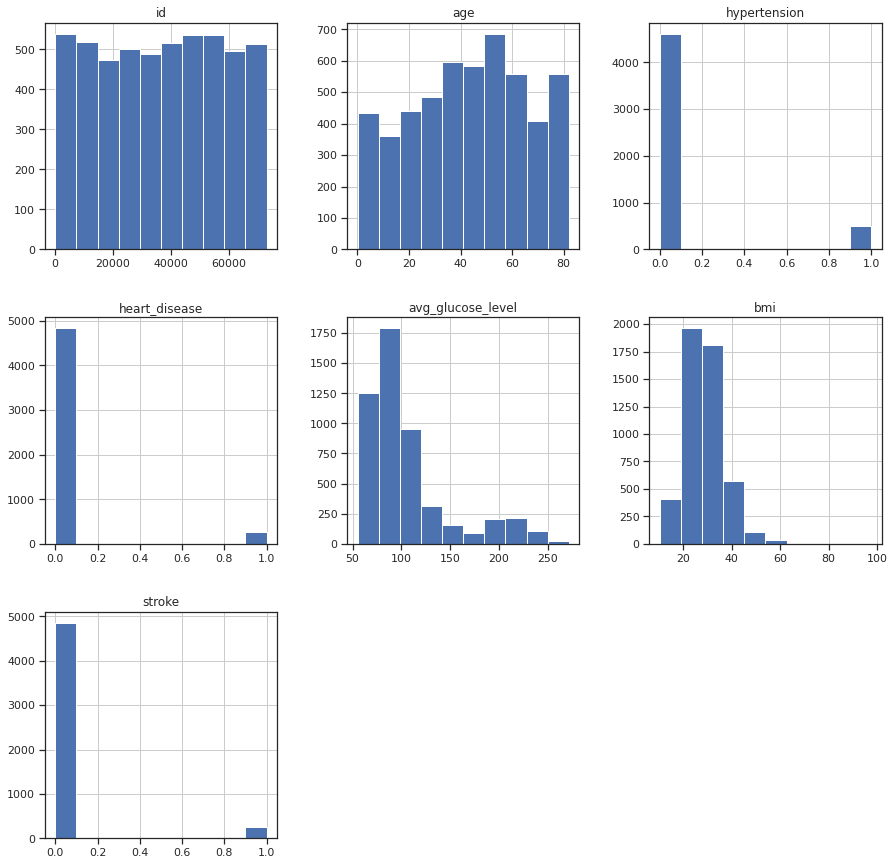

In [ ]:
data.hist(figsize=(15,15))
plt.show()

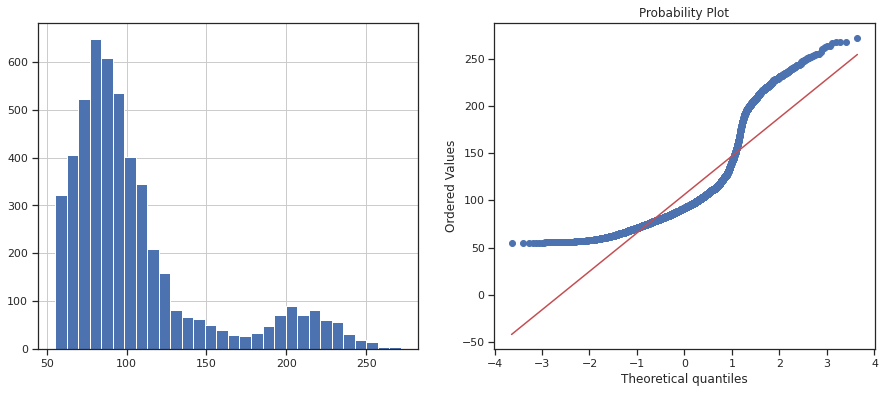

In [ ]:
diagnostic_plots(data, 'avg_glucose_level')

Задача №16.
Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).


Оптимальное значение λ = -1.0568324993842568


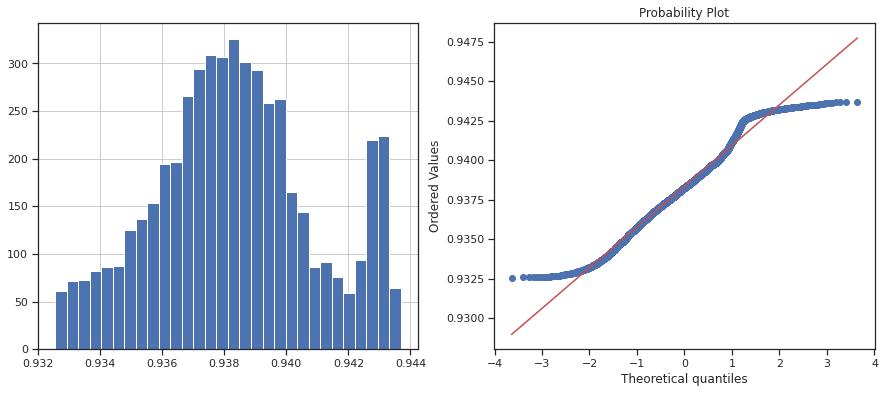

In [ ]:
data['avg_glucose_level_boxcox'], param = stats.boxcox(data['avg_glucose_level']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'avg_glucose_level_boxcox')

Задача №36.
Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

In [ ]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

In [ ]:
boston = load_boston()
boston_X = boston.data
boston_y = boston.target
boston_feature_names = boston['feature_names']
boston_x_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

Text(0, 0.5, 'Взаимная информация')

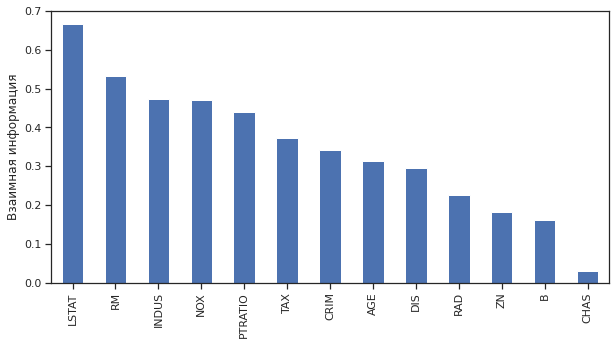

In [ ]:
mi = mutual_info_regression(boston_X, boston_y)
mi = pd.Series(mi)
mi.index = boston_feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(boston_X, boston_y)

list(zip(boston_feature_names, sel_mi.get_support()))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', True),
 ('CHAS', False),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', False),
 ('RAD', False),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', True)]

In [ ]:
boston_feature_names[sel_mi.get_support()]

array(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='<U7')